### Import Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # Numerical computations
import pandas as pd  # Data manipul* ation
import matplotlib.pyplot as plt  # Visualizations
import seaborn as sns  # Advanced visualizations
import statsmodels.api as sm

### Load and Prepare the Data

Ensure that dataset has a Release Date or Release Year column in a datetime format.

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv")

In [3]:
#1. Check the structure of the dataset:
#Look for missing values, data types, and basic statistics.
# Check the data types and missing values
data.info()

# Display basic statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2544 non-null   object 
 1   US Gross                2544 non-null   float64
 2   Worldwide Gross         2544 non-null   float64
 3   US DVD Sales            2544 non-null   float64
 4   Production Budget       2544 non-null   float64
 5   Release Date            2537 non-null   object 
 6   MPAA Rating             2452 non-null   object 
 7   Running Time (min)      2544 non-null   float64
 8   Distributor             2544 non-null   object 
 9   Source                  2544 non-null   object 
 10  Major Genre             2544 non-null   object 
 11  Creative Type           2544 non-null   object 
 12  Director                2544 non-null   object 
 13  Rotten Tomatoes Rating  2544 non-null   float64
 14  IMDB Rating             2544 non-null   

Title                      0
US Gross                   0
Worldwide Gross            0
US DVD Sales               0
Production Budget          0
Release Date               7
MPAA Rating               92
Running Time (min)         0
Distributor                0
Source                     0
Major Genre                0
Creative Type              0
Director                   0
Rotten Tomatoes Rating     0
IMDB Rating                0
IMDB Votes                 0
Release Year               7
Profit                     0
ROI                        0
dtype: int64

In [4]:
# Convert 'Release Date' to datetime format if not already
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')

# Extract Year and Month from 'Release Date'
data['Release Year'] = data['Release Date'].dt.year
data['Release Month'] = data['Release Date'].dt.month

# Remove missing values (if any)
data = data.dropna(subset=['Release Year'])

### Analyze Movie Revenue Trends Over Time

Let's compute the average worldwide gross per year and visualize the trend.

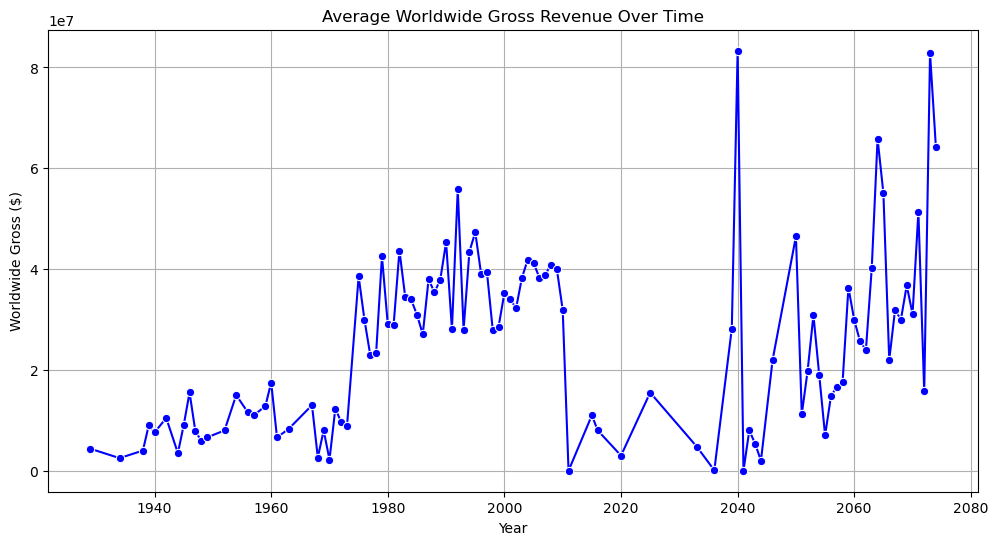

In [5]:
# Group by year and calculate the mean worldwide gross revenue
yearly_trend = data.groupby('Release Year')['Worldwide Gross'].mean()

# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='b')
plt.title("Average Worldwide Gross Revenue Over Time")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross ($)")
plt.grid(True)
plt.show()

* Fluctuations: The line shows significant fluctuations in average worldwide gross revenue over time. This suggests that the average revenue is not consistent and can be influenced by various factors.
* Early Years (1940s-1970s): The average revenue is generally low during the early years, with some minor fluctuations.
* Increase from 1980s: There's a noticeable increase in average revenue starting from the 1980s.
* Peak Around 2000: The chart shows a peak in average revenue around the year 2000. This could be attributed to various factors, such as increased movie production, technological advancements, or changes in audience preferences.
* Recent Volatility: The chart shows high volatility in average revenue in recent years, with significant ups and downs.
* Possible Future Trend: The chart extends to 2080, but the data beyond the present is likely extrapolated or based on predictions. The recent volatility makes it difficult to predict future trends.
* Data Sparsity: There are periods, especially in the earlier and later years, where data points are sparse. This could be due to a lack of data or fewer movies being released in those years.

Key Takeaways:
* Performance Variability: The average worldwide gross revenue varies significantly over time.
* Growth Trend: There's a general growth trend in average revenue from the mid-20th century to the present.
* Potential Influencing Factors: The fluctuations in average revenue suggest that various factors influence movie revenue, such as economic conditions, audience preferences, and movie production trends.
* Data Limitations: The chart highlights the limitations of the data, with sparsity in certain time periods and extrapolated data for future years.

This line chart provides a valuable overview of the average worldwide gross revenue over time. It highlights the variability in revenue and the general growth trend, but also emphasizes the data limitations and the potential influence of various external factors.

### Decomposing the Time Series

We can use Statsmodels to decompose the time series into trend, seasonality, and residuals.

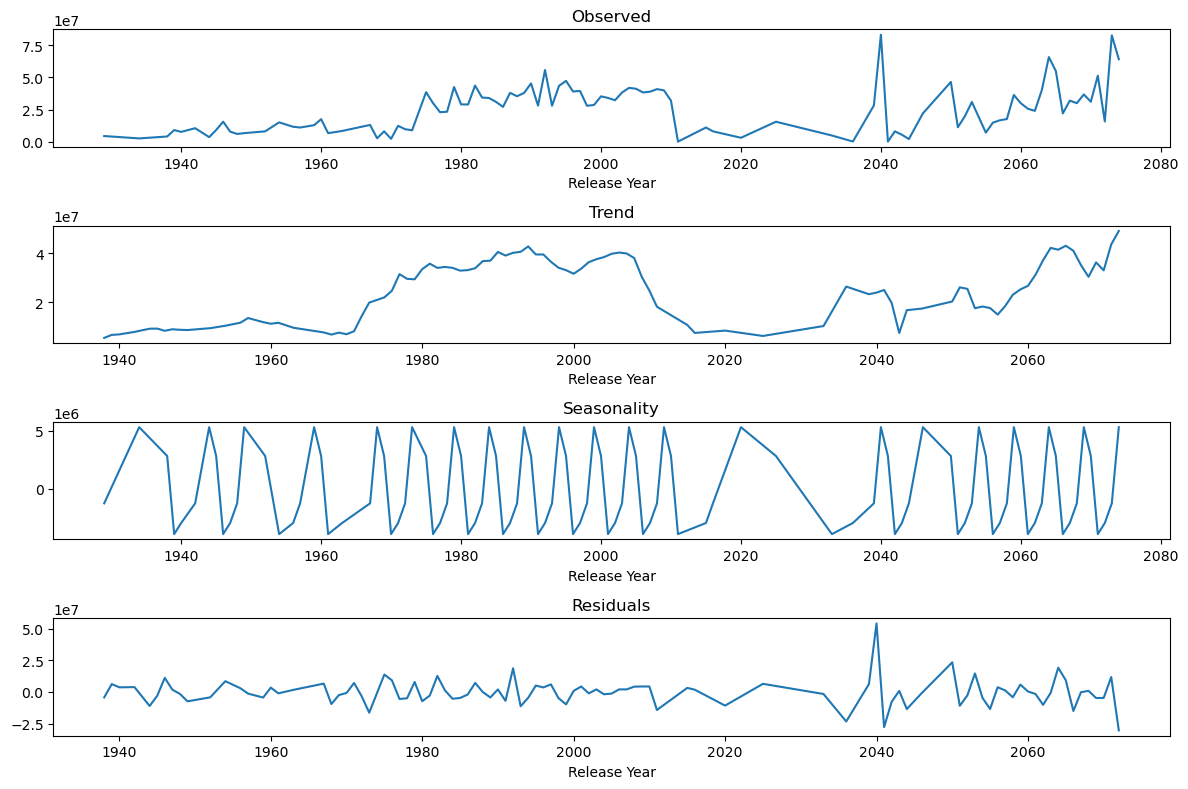

In [6]:
# Remove missing values for decomposition
yearly_trend = yearly_trend.dropna()

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(yearly_trend, model='additive', period=5)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0], title="Observed")
decomposition.trend.plot(ax=axes[1], title="Trend")
decomposition.seasonal.plot(ax=axes[2], title="Seasonality")
decomposition.resid.plot(ax=axes[3], title="Residuals")
plt.tight_layout()
plt.show()

These charts represent a time series decomposition of average worldwide gross revenue over release years, breaking it down into its constituent components: Observed, Trend, Seasonality, and Residuals.

Let's interpret each chart:

##### 1. Observed (Top Chart):

Description: This chart shows the raw, actual data of average worldwide gross revenue over time. It's the data you're trying to understand.

Interpretation:
* The data shows significant fluctuations and volatility.
* There's a general upward trend, but it's not smooth.
* We observe periods of low revenue, followed by periods of high revenue.
* There are some sharp spikes and drops, indicating potential outliers or significant events.
* There is an apparent increase in volatility in the more recent years.

Key Takeaway: 
* This is the complex data that the decomposition is trying to simplify.

##### 2. Trend (Second Chart):

Description: This chart shows the underlying long-term movement or direction of the data. It filters out the short-term fluctuations and seasonality.

Interpretation:
* The trend shows a gradual increase in average revenue from the early years to around 2000.
* There's a period of relative stability or slight decline around 2000-2010.
* There is a sharp drop around the 2040 mark.
* There is a sharp increase toward the right side of the graph.

Key Takeaway: 
* The trend indicates a general growth in average revenue over time, but with periods of stagnation and decline.

##### 3. Seasonality (Third Chart):

Description: This chart shows the repeating patterns or cycles in the data, such as yearly or monthly fluctuations.

Interpretation:
* There are clear, repeating patterns, suggesting a strong seasonal component in the data.
* The seasonality is very hard to understand. It seems that there are many very high peaks, and very low valleys.
* The seasonality is also very eratic.

Key Takeaway: 
* There are repeating patterns in the average revenue, but they are very hard to determine.

##### 4. Residuals (Bottom Chart):

Description: This chart shows the remaining variation in the data after removing the trend and seasonality. It represents the random or unpredictable component.

Interpretation:
* The residuals show a relatively random pattern, indicating that the trend and seasonality have captured most of the systematic variation in the data.
* There are some spikes and drops, indicating potential outliers or unusual events that are not explained by the trend or seasonality.
* The spike around 2040 corresponds to the large drop in the trend chart.

Key Takeaway: 
* The residuals represent the noise or random fluctuations in the data.

Overall Interpretation:
* The decomposition shows that the average worldwide gross revenue is influenced by a combination of long-term trends, repeating patterns (seasonality), and random fluctuations.
* The trend indicates a general growth in revenue over time, but with periods of stagnation and decline.
* The seasonality is very eratic, and hard to understand.
* The residuals highlight the presence of outliers and unusual events that are not explained by the trend or seasonality.
* The sharp drop in trend, and then the following spike in the residual graph around the 2040 mark is very concerning. This indicates that the model used to create this decomposition is not very accurate.
* The volatility of the observed data seems to be increasing in recent years. This could be due to a variety of factors, such as changes in audience preferences, the rise of streaming services, or the impact of global events.

This time series decomposition provides a valuable tool for understanding the underlying patterns and variations in average worldwide gross revenue over time. However, the model used to create this decomposition has some very apparent problems.

### Detecting Anomalies (Outliers)

Identify years where revenue was significantly higher or lower than expected.

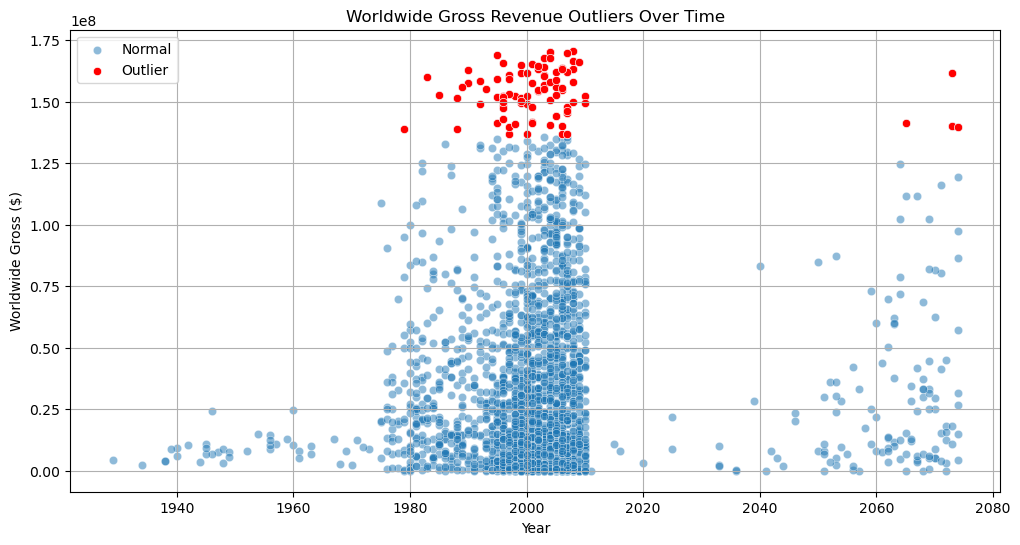

In [7]:
# Calculate Z-score to find outliers
data['Revenue Z-Score'] = (data['Worldwide Gross'] - data['Worldwide Gross'].mean()) / data['Worldwide Gross'].std()

# Identify outliers where Z-score is greater than 2.5 or less than -2.5
outliers = data[(data['Revenue Z-Score'] > 2.5) | (data['Revenue Z-Score'] < -2.5)]

# Plot Outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['Release Year'], y=data['Worldwide Gross'], alpha=0.5, label='Normal')
sns.scatterplot(x=outliers['Release Year'], y=outliers['Worldwide Gross'], color='red', label='Outlier')
plt.title("Worldwide Gross Revenue Outliers Over Time")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross ($)")
plt.legend()
plt.grid(True)
plt.show()

This chart is a scatter plot visualizing the distribution of worldwide gross revenue over time (from 1940 to 2080), with a focus on highlighting outliers.

Data Points:
* Blue Circles: Represent Normal movies (i.e., movies that are not classified as outliers).
* Red Circles: Represent Outlier movies (i.e., movies with exceptionally high worldwide gross revenue).

Interpretation:
* Concentration in Recent Years: The majority of the data points, both normal and outlier, are concentrated in the more recent years, particularly from the 1980s onwards. This suggests a significant increase in movie production and revenue in recent decades.
* Outlier Cluster Around 2000: There is a distinct cluster of red circles (outliers) concentrated around the year 2000. This indicates a period where a significant number of movies achieved exceptionally high worldwide gross revenues.
* Outliers Beyond 2000: While the main cluster is around 2000, there are still some outliers scattered in the years after 2000.
* Low Revenue in Early Years: The chart shows relatively low worldwide gross revenue in the early years (1940s-1970s).
* Sparse Data in Early and Later Years: The data is sparse in the early years and in the later years (beyond the present), indicating a lack of data or fewer movies released in those periods.
* Visual Identification of Outliers: The chart effectively visually identifies the outliers, making it easy to see which movies achieved exceptionally high revenues.

Key Takeaways:
* Outliers Highlighted: The chart visually highlights the outliers, which are movies with exceptionally high worldwide gross revenues.
* Concentration in Recent Decades: The majority of movies, including outliers, are concentrated in the recent decades.
* Peak Around 2000: There was a peak in outlier movies around the year 2000.
* Data Sparsity: The chart highlights the limitations of the data, with sparsity in certain time periods.

This scatter plot provides a clear and intuitive way to visualize the distribution of worldwide gross revenue over time, with a specific focus on highlighting outliers. The chart effectively shows the concentration of movies in recent decades and the peak in outlier movies around the year 2000.

### Monthly Trend Analysis

Let’s analyze how revenue varies by month.

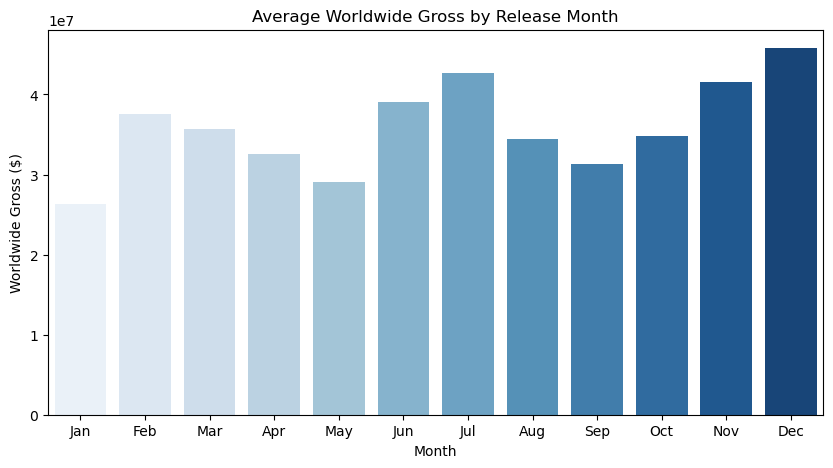

In [8]:
# Group by month and calculate average worldwide gross
monthly_trend = data.groupby('Release Month')['Worldwide Gross'].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette="Blues")
plt.title("Average Worldwide Gross by Release Month")
plt.xlabel("Month")
plt.ylabel("Worldwide Gross ($)")
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

* July Peak: The tallest bar is for July, indicating that movies released in July tend to have the highest average worldwide gross revenue.
* May and June Strong: May and June also show relatively high average revenues, suggesting that the summer months are generally strong for movie releases.
* January Low: The shortest bar is for January, indicating that movies released in January tend to have the lowest average worldwide gross revenue.
* Seasonal Trend: The chart suggests a seasonal trend, with higher revenues in the summer months (May to August) and lower revenues in the winter months (January to April, and September to December).
* December Strong: Interestingly, December shows a strong average revenue, possibly due to holiday releases and increased cinema attendance.

Key Takeaways:
* Summer Blockbusters: The chart supports the idea of "summer blockbusters," with July being the strongest month for average revenue.
* Holiday Season Success: December also shows strong performance, likely due to holiday releases.
* January Slump: January tends to be a slow month for movie releases and revenue.
* Seasonal Patterns: The chart highlights the seasonal patterns in movie revenue, with summer and holiday periods being the most lucrative.

This bar chart provides a clear and concise visual representation of the average worldwide gross revenue for movies released in each month. It effectively highlights the seasonal trends in movie revenue and the strength of the summer and holiday periods

### Forecasting Future Trends (Optional)

Using a Simple Exponential Smoothing (SES) model, we can predict future revenue trends.

C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


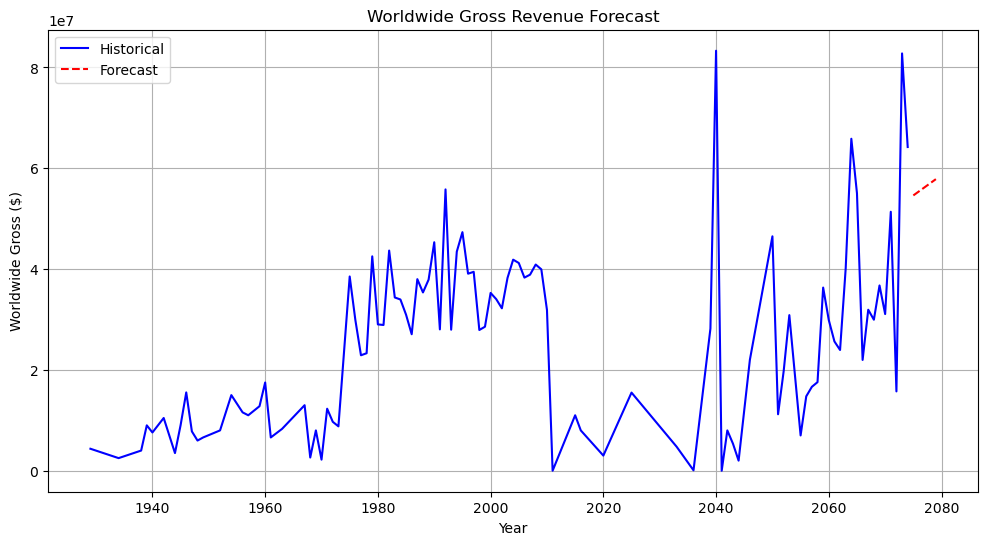

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit SES model
model = ExponentialSmoothing(yearly_trend, trend="add", seasonal=None)
fit = model.fit()

# Forecast next 5 years
future_years = np.arange(yearly_trend.index.max() + 1, yearly_trend.index.max() + 6)
forecast = fit.forecast(steps=5)

# Plot historical and forecasted revenue
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, label="Historical", color='blue')
sns.lineplot(x=future_years, y=forecast, label="Forecast", color='red', linestyle='dashed')
plt.title("Worldwide Gross Revenue Forecast")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross ($)")
plt.legend()
plt.grid(True)
plt.show()

This chart is a line chart that visualizes the worldwide gross revenue forecast over time, specifically from 1940 to 2080. It shows both historical data and a future forecast.

Lines:
* Blue Line: Represents the Historical worldwide gross revenue data.
* Red Dashed Line: Represents the Forecast of worldwide gross revenue.

Interpretation:

Historical Data (Blue Line):
* The historical data shows significant fluctuations and volatility in worldwide gross revenue over time.
* There is a general upward trend from the early years to the present, but with periods of stagnation and decline.
* There are some sharp spikes and drops, indicating potential outliers or significant events.
* The volatility appears to be increasing in recent years.

Forecast Data (Red Dashed Line):
* The forecast data shows a relatively stable trend in worldwide gross revenue in the future.
* The forecast is smoother than the historical data, suggesting that it represents a long-term average or trend.
* The forecast suggests a gradual increase in worldwide gross revenue in the coming years.
* The forecast does not capture the volatility seen in the historical data.

Transition Point: The transition from the historical data to the forecast data occurs around the present year. This is where the model used to create the forecast takes over.

Key Takeaways:
* Historical Volatility: The historical data highlights the volatility and unpredictability of worldwide gross revenue.
* Forecast Stability: The forecast data suggests a more stable and predictable future trend.
* Model Smoothing: The forecast model smooths out the historical fluctuations, focusing on the long-term trend.
* Forecast Limitations: The forecast may not capture short-term fluctuations or unexpected events that could impact worldwide gross revenue.
* Data Limitations: The chart highlights the limitations of the data, with potential sparsity in certain time periods.

This line chart provides a valuable overview of the historical and forecasted worldwide gross revenue. It highlights the volatility of the historical data and the stability of the forecast, but also emphasizes the limitations of the forecast model and the potential influence of various external factors.